Q1. Linear regression and Regularization:

(a) Predict the “Overall” (target attribute: “overall”) rating of the players using Linear regression report the Mean Absolute Error(MAE), Mean Square Error(MSE), R2 score.

(b) Compare the performance of linear regression, Ridge regression, and Lasso regression models. Perform the hyperparameters tuning and observe how they affect the model’s bias-variance trade-off, investigate the impact of the Lasso regularisation parameter on this feature selection process.

Note: Please carry out the necessary data preprocessing and test-train split as 20 : 80%.

The use of the scikit-learn library is allowed for this question. For (b), include necessary
metrics like MSE, MAE, R2 Score for performance analysis and necessary plots (Ex:Scatter plots/line plots) for hyperparameters tuning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.evaluate import bias_variance_decomp
from google.colab import drive

drive.mount('/content/drive')


path_link = "/content/drive/MyDrive/ML 1st half Tutorials/Assignment1/football.csv"
df = pd.read_csv(path_link)
df = df.drop(['club_team_id','club_name','league_name','club_jersey_number','nation_jersey_number','preferred_foot','work_rate','body_type','player_tags','player_traits','sofifa_id','short_name'],axis=1)

median_value = df['value_eur'].median()
df['value_eur'].fillna(value=median_value,inplace=True)

median_value = df['wage_eur'].median()
df['wage_eur'].fillna(value=median_value,inplace=True)

median_value = df['league_level'].median()
df['league_level'].fillna(value=median_value,inplace=True)

median_value = df['release_clause_eur'].median()
df['release_clause_eur'].fillna(value=median_value,inplace=True)

median_value = df['pace'].median()
df['pace'].fillna(value=median_value,inplace=True)

median_value = df['shooting'].median()
df['shooting'].fillna(value=median_value,inplace=True)

median_value = df['passing'].median()
df['passing'].fillna(value=median_value,inplace=True)

median_value = df['dribbling'].median()
df['dribbling'].fillna(value=median_value,inplace=True)

median_value = df['defending'].median()
df['defending'].fillna(value=median_value,inplace=True)

median_value = df['physic'].median()
df['physic'].fillna(value=median_value,inplace=True)

median_value = df['goalkeeping_speed'].median()
df['goalkeeping_speed'].fillna(value=median_value,inplace=True)

df.info()

Mounted at /content/drive
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7772 entries, 0 to 7771
Data columns (total 54 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   overall                      7772 non-null   int64  
 1   potential                    7772 non-null   int64  
 2   value_eur                    7772 non-null   float64
 3   wage_eur                     7772 non-null   float64
 4   age                          7772 non-null   int64  
 5   height_cm                    7772 non-null   int64  
 6   weight_kg                    7772 non-null   int64  
 7   league_level                 7772 non-null   float64
 8   weak_foot                    7772 non-null   int64  
 9   skill_moves                  7772 non-null   int64  
 10  international_reputation     7772 non-null   int64  
 11  release_clause_eur           7772 non-null   float64
 12  pace                         7772 non-null   float

In [2]:
df.columns

Index(['overall', 'potential', 'value_eur', 'wage_eur', 'age', 'height_cm',
       'weight_kg', 'league_level', 'weak_foot', 'skill_moves',
       'international_reputation', 'release_clause_eur', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
       'power_long_shots', 'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking_awareness',
       'defending_standing_tackle', 'defending_sliding_tackle',
   

In [3]:
#Feature Vector
X = df[[ 'potential', 'value_eur', 'wage_eur', 'age', 'height_cm',
       'weight_kg', 'league_level', 'weak_foot', 'skill_moves',
       'international_reputation', 'release_clause_eur', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
       'power_long_shots', 'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking_awareness',
       'defending_standing_tackle', 'defending_sliding_tackle',
       'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes', 'goalkeeping_speed',
       'contribution_type']]
#Prediction Vector
Y = df['overall']

In [4]:
class Standardizer:
    def __init__(self, mean, stdev):
        self.mean = mean
        self.stdev = stdev
    def scale(self, x):
        return (x - self.mean)/self.stdev

In [5]:
for feature in df.columns:
    df[feature] = df[feature].apply(Standardizer(df[feature].mean(), df[feature].std()).scale)

In [6]:
df.sample(frac=1)

,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,league_level,weak_foot,skill_moves,...,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,contribution_type
1492,0.862927,0.317881,-0.022179,-0.448263,0.512981,-0.653522,-0.503497,-0.472109,0.001877,0.691129,...,-1.337047,-1.254543,-1.053032,-0.394910,-0.038970,-0.278229,-0.104820,-0.503653,0.048755,1.09161
4924,-0.481364,-0.998878,-0.345558,-0.326462,0.976062,0.658135,2.051074,2.164782,0.001877,-0.583237,...,-0.472015,-0.680756,-1.004577,-0.165721,-0.098674,-0.400935,-0.395977,-0.503653,0.048755,1.09161
7361,-1.489583,-0.834283,-0.371907,-0.468563,-0.876260,0.512396,-0.787338,-0.472109,0.001877,-0.583237,...,0.393017,0.371186,0.594452,-0.566802,-0.397194,-0.584995,-0.279514,-0.391660,0.048755,-0.91596
7548,-1.825656,-1.821852,-0.392029,-0.468563,-0.413179,-0.362043,-0.645417,-0.472109,0.001877,-0.583237,...,0.189480,0.084292,0.158353,-0.108424,-0.218082,-0.216876,-0.279514,-0.391660,0.048755,-0.91596
1074,1.030964,0.482475,0.035311,0.769742,0.512981,0.803875,0.773789,-0.472109,0.001877,-0.583237,...,1.359818,1.088419,1.321283,-0.394910,-0.397194,-0.278229,-0.221283,-0.447656,0.048755,-0.91596
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1752,0.694891,0.153286,-0.213811,0.241940,0.976062,0.075176,0.631868,-0.472109,0.001877,-0.583237,...,1.207165,1.088419,1.127461,-0.509505,-0.158378,-0.584995,-0.512440,-0.559650,0.048755,-0.91596
6853,-1.153510,-1.657257,-0.376698,-0.367062,0.512981,-1.236481,-2.490385,3.483227,0.001877,-0.583237,...,0.291249,0.371186,0.497541,-0.051127,-0.098674,-0.155522,-0.046588,-0.279666,0.048755,1.09161
5446,-0.649401,-1.163473,-0.359930,-0.407663,1.207602,0.512396,0.489947,2.164782,0.001877,0.691129,...,0.393017,0.323370,0.400630,-0.280316,-0.218082,-0.216876,-0.570672,-0.279666,0.048755,1.09161
1593,0.694891,0.153286,-0.127577,1.338144,0.744521,0.512396,-0.361576,-0.472109,0.001877,0.691129,...,-0.421131,-0.680756,-0.810755,-0.394910,-0.337490,-0.584995,-0.221283,0.000317,0.048755,1.09161


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=101)

Part a)

In [9]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,Y_train)
print(lm.intercept_)
coefficients = pd.DataFrame(lm.coef_,X_train.columns,columns=['Coefficient'])
print(coefficients)

3.2477748210506547
                              Coefficient
potential                    4.601450e-01
value_eur                    4.314121e-08
wage_eur                     8.828003e-06
age                          3.763298e-01
height_cm                   -1.840778e-02
weight_kg                    1.729071e-02
league_level                -2.152967e-01
weak_foot                   -5.913702e-02
skill_moves                  2.979526e-01
international_reputation    -1.993894e-01
release_clause_eur          -5.199682e-09
pace                        -1.010426e-01
shooting                    -1.136061e-01
passing                      9.119100e-02
dribbling                    5.724894e-02
defending                    2.614123e-02
physic                      -8.116436e-03
attacking_crossing           3.603176e-03
attacking_finishing          5.948754e-02
attacking_heading_accuracy   3.462488e-02
attacking_short_passing      3.919200e-02
attacking_volleys            2.345855e-03
skill_dribbling

[70.27243538 68.47741489 66.4793199  ... 69.14523213 69.89376535
 68.46987252]
4473    67
3207    70
4580    67
2354    72
1602    73
        ..
5389    66
4428    67
2705    71
2483    71
2999    70
Name: overall, Length: 1555, dtype: int64


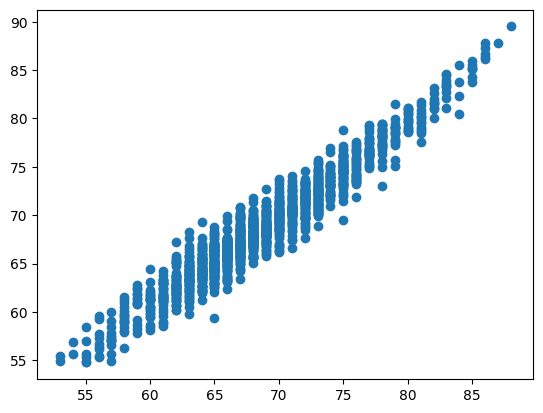

In [10]:
predictions = lm.predict(X_test)
print(predictions)
print(Y_test)
plt.scatter(Y_test,predictions)

<ipython-input-11-328975898035>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((Y_test-predictions),bins=50);


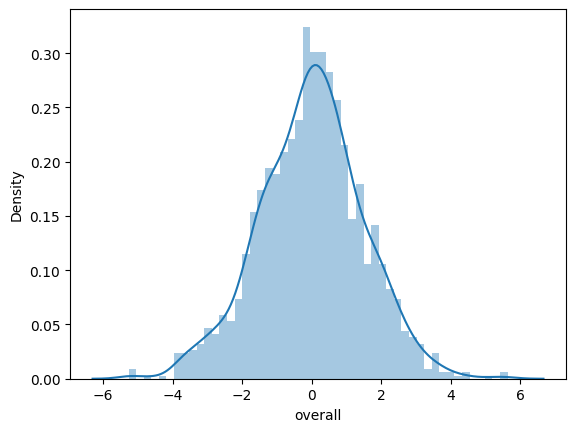

In [11]:
sns.distplot((Y_test-predictions),bins=50);

In [12]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(Y_test, predictions))
print('MSE:', metrics.mean_squared_error(Y_test, predictions))
print('R2 Score: ', metrics.r2_score(Y_test,predictions))
mse, bias, variance = bias_variance_decomp(lm, X_train.values, Y_train.values, X_test.values, Y_test.values, loss='mse', random_seed=123)
print("Bias: ",bias)
print("Variance: ",variance)

MAE: 1.1679406048220486
MSE: 2.246148780836585
R2 Score:  0.9328113342154056
Bias:  2.2442969268411135
Variance:  0.021921664120923272


Part b)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.05661e-16): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.05669e-16): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.05684e-16): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.05729e-16): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarnin

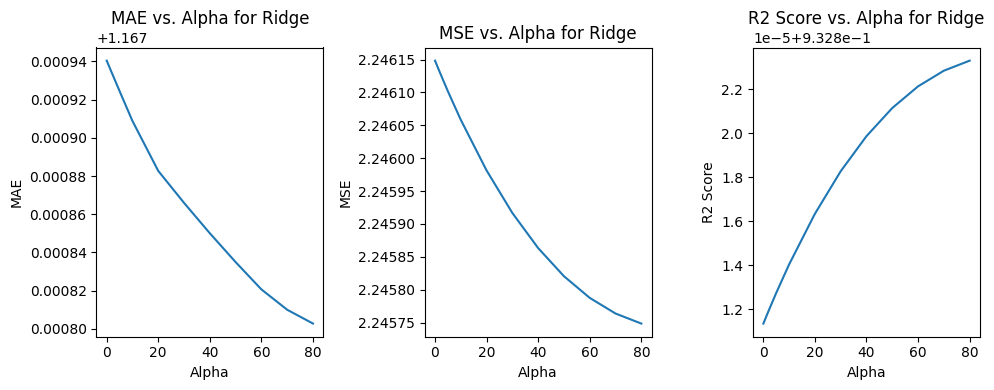

Best Ridge Alpha: 80


In [13]:
#Ridge Regression HyperParameter training
from sklearn.linear_model import Ridge, Lasso
parameters=[0.05,0.1,0.2,0.5,1,2,5,10,20,30,40,50,60,70,80]
r_mae_list = []
r_mse_list = []
r_r2_list = []

for a in parameters:
    ridge_model = Ridge(alpha=a)
    ridge_model.fit(X_train,Y_train)
    ridge_pred = ridge_model.predict(X_test)

    ridge_mae = metrics.mean_absolute_error(Y_test, ridge_pred)
    ridge_mse = metrics.mean_squared_error(Y_test, ridge_pred)
    ridge_r2 = metrics.r2_score(Y_test, ridge_pred)

    r_mae_list.append(ridge_mae)
    r_mse_list.append(ridge_mse)
    r_r2_list.append(ridge_r2)

# Plot hyperparameter tuning results for Ridge Regression
plt.figure(figsize=(10, 4))
plt.subplot(1, 3, 1)
plt.plot(parameters, r_mae_list)
plt.title("MAE vs. Alpha for Ridge")
plt.xlabel("Alpha")
plt.ylabel("MAE")

plt.subplot(1, 3, 2)
plt.plot(parameters, r_mse_list)
plt.title("MSE vs. Alpha for Ridge")
plt.xlabel("Alpha")
plt.ylabel("MSE")

plt.subplot(1, 3, 3)
plt.plot(parameters,r_r2_list)
plt.title("R2 Score vs. Alpha for Ridge")
plt.xlabel("Alpha")
plt.ylabel("R2 Score")

plt.tight_layout()
plt.show()

best_alpha = parameters[r_r2_list.index(max(r_r2_list))]  # Change the value based on your selection criteria
print(f"Best Ridge Alpha: {best_alpha}")

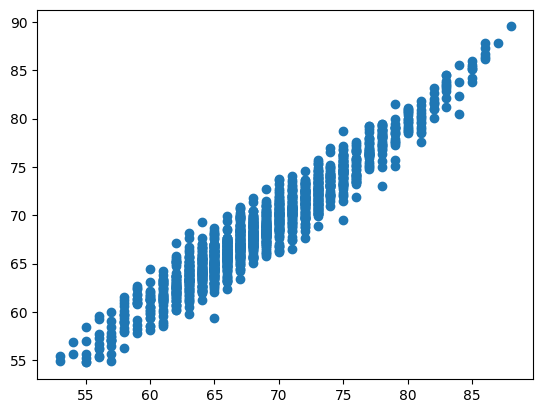

In [14]:
#Ridge Regression Model
ridgeReg = Ridge(alpha=best_alpha)

ridgeReg.fit(X_train,Y_train)
predictions = ridgeReg.predict(X_test)
plt.scatter(Y_test,predictions)

#train and test scorefor ridge regression
# train_score_ridge = ridgeReg.score(X_train, Y_train)
# test_score_ridge = ridgeReg.score(X_test, Y_test)
# print("The train score for ridge model is ",train_score_ridge)
# print("The test score for ridge model is ",test_score_ridge)

<ipython-input-15-4d94dd3f31b2>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((Y_test-predictions),bins=50);


MAE: 1.1678027612254973
MSE: 2.2457485379408633
R2 Score:  0.9328233066129524


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.04091e-16): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.0749e-16): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.00761e-16): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=9.19903e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning

Bias:  2.24390123051549
Variance:  0.021453023384631363


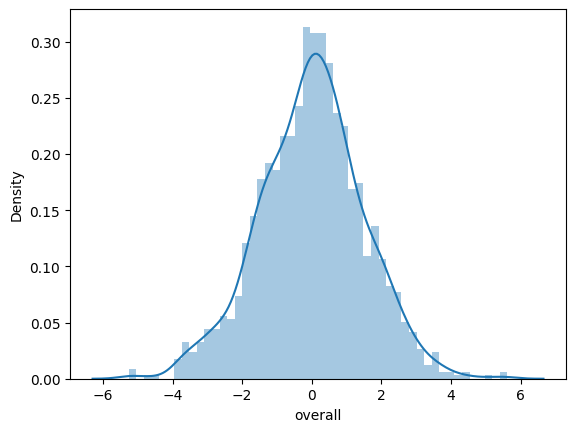

In [15]:
sns.distplot((Y_test-predictions),bins=50);
print('MAE:', metrics.mean_absolute_error(Y_test, predictions))
print('MSE:', metrics.mean_squared_error(Y_test, predictions))
print('R2 Score: ', metrics.r2_score(Y_test,predictions))

#Bias and Variance for Ridge Regression
mse, bias, variance = bias_variance_decomp(ridgeReg, X_train.values, Y_train.values, X_test.values, Y_test.values, loss='mse', num_rounds=200, random_seed=123)
print("Bias: ",bias)
print("Variance: ",variance)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.998e+03, tolerance: 2.232e+01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.820e+03, tolerance: 2.232e+01
  model = cd_fast.enet_coordinate_descent(


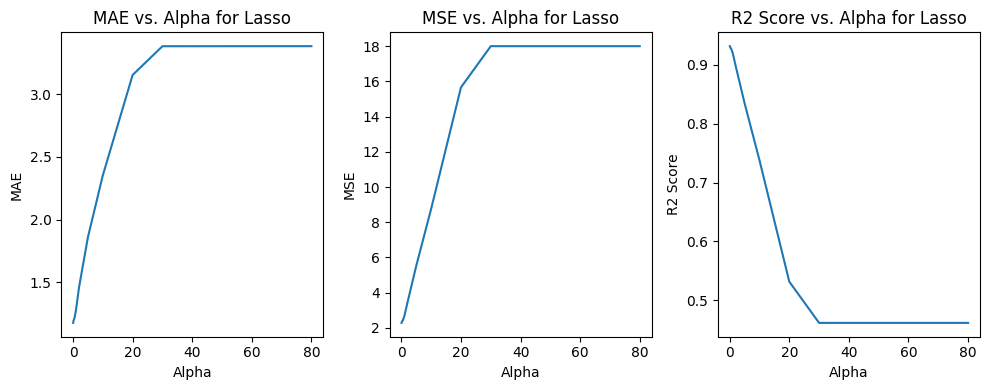

Best Lasso Alpha: 80


In [16]:
#Lasso Regression HyperParameter training
parameters=[0.05,0.1,0.2,0.5,1,2,5,10,20,30,40,50,60,70,80]
la_mae_list = []
la_mse_list = []
la_r2_list = []

for a in parameters:
    lasso_model = Lasso(alpha=a)
    lasso_model.fit(X_train,Y_train)
    lasso_pred = lasso_model.predict(X_test)

    lasso_mae = metrics.mean_absolute_error(Y_test, lasso_pred)
    lasso_mse = metrics.mean_squared_error(Y_test, lasso_pred)
    lasso_r2 = metrics.r2_score(Y_test, lasso_pred)

    la_mae_list.append(lasso_mae)
    la_mse_list.append(lasso_mse)
    la_r2_list.append(lasso_r2)

# Plot hyperparameter tuning results for Lasso Regression
plt.figure(figsize=(10, 4))
plt.subplot(1, 3, 1)
plt.plot(parameters, la_mae_list)
plt.title("MAE vs. Alpha for Lasso")
plt.xlabel("Alpha")
plt.ylabel("MAE")

plt.subplot(1, 3, 2)
plt.plot(parameters, la_mse_list)
plt.title("MSE vs. Alpha for Lasso")
plt.xlabel("Alpha")
plt.ylabel("MSE")

plt.subplot(1, 3, 3)
plt.plot(parameters,la_r2_list)
plt.title("R2 Score vs. Alpha for Lasso")
plt.xlabel("Alpha")
plt.ylabel("R2 Score")

plt.tight_layout()
plt.show()

best_alpha = parameters[r_r2_list.index(max(r_r2_list))]  # Change the value based on your selection criteria
print(f"Best Lasso Alpha: {best_alpha}")

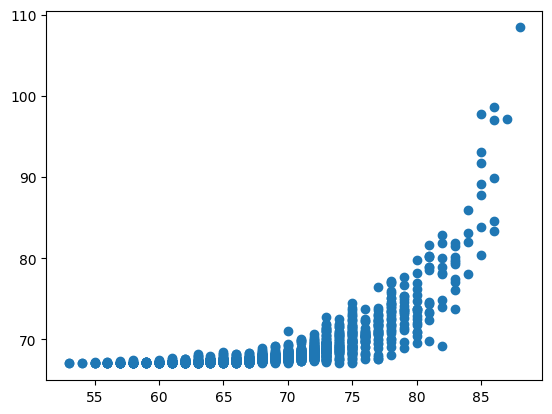

In [17]:
#Lasso Regression Model
lasso = Lasso(alpha = best_alpha)
lasso.fit(X_train,Y_train)
predictions = lasso.predict(X_test)
plt.scatter(Y_test,predictions)
# train_score_ls =lasso.score(X_train,Y_train)
# test_score_ls =lasso.score(X_test,Y_test)

# print("The train score for ls model is ",train_score_ls)
# print("The test score for ls model is ",test_score_ls)

<ipython-input-18-1c2b3260f4d7>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((Y_test-predictions),bins=50);


MAE: 3.3834035366165436
MSE: 18.000729011080374
R2 Score:  0.4615472600376592
Bias:  17.944989136017934
Variance:  0.04600332176149668


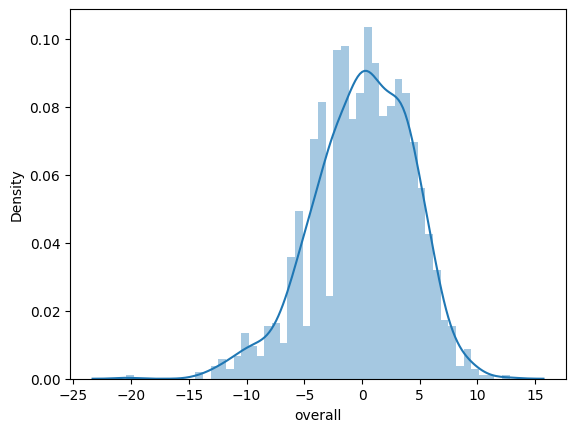

In [18]:
sns.distplot((Y_test-predictions),bins=50);
print('MAE:', metrics.mean_absolute_error(Y_test, predictions))
print('MSE:', metrics.mean_squared_error(Y_test, predictions))
print('R2 Score: ', metrics.r2_score(Y_test,predictions))

mse, bias, variance = bias_variance_decomp(lasso, X_train.values, Y_train.values, X_test.values, Y_test.values, loss='mse', num_rounds=200, random_seed=123)
print("Bias: ",bias)
print("Variance: ",variance)